<a href="https://colab.research.google.com/github/Laura-Barrera/Backend_Proyecto_Electiva_II/blob/main/Copia_de_Base_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers[tf] huggingface_hub google-cloud-dialogflow fastapi python-multipart uvicorn pyngrok nest_asyncio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of onnxconverter-common to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of tf2onnx to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of tf2onnx to determine

In [ ]:
import tensorflow as tf
from google.colab import drive

import os
from google.cloud import dialogflow_v2 as dialogflow
import json
from google.colab import drive
import pandas as pd
import numpy as np
import uvicorn
import threading
from pyngrok import ngrok
import joblib
import nest_asyncio

from fastapi import FastAPI, File, UploadFile, Form
from fastapi.responses import JSONResponse
from typing import Optional
import shutil
import uuid
import os

# Configuraciones generales
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

from huggingface_hub import hf_hub_download
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

In [ ]:
# Acceso a drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Carpetas de Melissa
path_imagenes = "/content/drive/MyDrive/Segundo Semestre Especializacion/Electiva II/Proyecto Integrador/Imagenes prueba/"
path_modelos = "/content/drive/MyDrive/Segundo Semestre Especializacion/Electiva II/Proyecto Integrador/Modelos/"
path_credenciales =  "/content/drive/MyDrive/Segundo Semestre Especializacion/Electiva II/Proyecto Integrador/Credenciales/"

# Carpetas de Diana
#path_imagenes = "/content/drive/MyDrive/Colab Notebooks/MODULO7/proyecto/Proyecto Integrador/Imagenes prueba/"
#path_modelos = "/content/drive/MyDrive/Colab Notebooks/MODULO7/proyecto/Proyecto Integrador/Modelos/"
#path_credenciales =  "/content/drive/MyDrive/Segundo Semestre Especializacion/Electiva II/Proyecto Integrador/Credenciales/"

# Carpetas de Luis
#path_imagenes = "/content/drive/MyDrive/Colab Notebooks/Proyecto/Imagenes prueba/"
#path_credenciales =  "/content/drive/MyDrive/Colab Notebooks/Proyecto/Credenciales/"

In [ ]:
# modelo CNN
# modelo_cnn = tf.keras.models.load_model(path_modelos + "plant_disease_efficientnetb4.h5")

Urilizar modelo desde Huggong Face

https://huggingface.co/liriope/PlantDiseaseDetection

In [ ]:
# Descargar el modelo
model_path = hf_hub_download(repo_id="liriope/PlantDiseaseDetection", filename="plant_disease_efficientnetb4.h5")

# Cargar el modelo completo incluyendo la capa personalizada
modelo_cnn = tf.keras.models.load_model(model_path)

plant_disease_efficientnetb4.h5:   0%|          | 0.00/98.0M [00:00<?, ?B/s]

In [ ]:
modelo_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 380, 380, 3)]     0         
                                                                 
 efficientnetb4 (Functional  (None, 12, 12, 1792)      17673823  
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1792)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               459008    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 38)                9766  

In [ ]:
image_path = path_imagenes+"AppleCedarRust1.JPG"

In [ ]:
img = image.load_img(image_path, target_size=(380, 380))  # El tamaño debe coincidir con el tamaño de entrada del modelo

# Convertir la imagen a un array de NumPy
img_array = image.img_to_array(img)

# Añadir una dimensión extra para el batch (modelo espera un batch de imágenes, no solo una)
img_array = np.expand_dims(img_array, axis=0)

# Preprocesar la imagen para que esté en el formato correcto para EfficientNetB4
img_array = preprocess_input(img_array)

# Realizar la predicción
predictions = modelo_cnn.predict(img_array)

1/1 [==============================] - 5s 5s/step


In [ ]:
predictions

array([[1.45863425e-02, 3.07956299e-07, 9.85154927e-01, 1.13097249e-05,
        5.87901070e-07, 6.89906228e-05, 5.52513924e-10, 1.95428056e-15,
        3.00576369e-11, 7.51138230e-15, 7.75764151e-19, 4.36932120e-13,
        6.35777098e-10, 8.26863346e-16, 3.18444048e-15, 2.71762664e-11,
        1.76531452e-04, 3.59803688e-16, 9.30477528e-10, 8.80655751e-14,
        1.15062216e-13, 2.13935410e-13, 4.85032264e-23, 4.75518261e-16,
        3.77709539e-12, 2.39262388e-10, 1.91429134e-13, 4.34347299e-16,
        6.02897246e-11, 6.78822775e-13, 1.00607599e-06, 9.93627484e-17,
        8.60079577e-11, 1.05587961e-18, 1.35705647e-15, 7.31037247e-13,
        7.00408156e-21, 1.42047578e-14]], dtype=float32)

In [ ]:
diccionario_es = {
    0: 'Manzana Sarna del manzano',
    1: 'Manzana Podredumbre negra',
    2: 'Manzana Oxido del cedro y manzano',
    3: 'Manzana sana',
    4: 'Arándano sano',
    5: 'Cereza (incluyendo agria) mildiú polvoroso',
   6: 'Cereza (incluyendo agria) sana',
   7: 'Maíz Mancha foliar de Cercospora Mancha gris de la hoja',
   8: 'Maíz Roya común',
   9: 'Maíz Tizón foliar del norte',
   10: 'Maíz sano',
   11: 'Uva Podredumbre negra',
   12: 'Uva Esca (Yesca)',
   13: 'Uva Tizón de la hoja (Mancha foliar de Isariopsis)',
   14: 'Uva sana',
   15: 'Naranja Huanglongbing (Greening de los cítricos)',
   16: 'Melocotón Mancha bacteriana',
   17: 'Melocotón sano',
   18: 'Pimiento Mancha bacteriana',
   19: 'Pimiento sano',
   20: 'Papa Tizón temprano',
   21: 'Papa Tizón tardío',
   22: 'Papa sana',
   23: 'Frambuesa sana',
   24: 'Soja sana',
   25: 'Calabaza Oídio',
   26: 'Fresa Quemadura de la hoja',
   27: 'Fresa sana',
   28: 'Tomate Mancha bacteriana',
   29: 'Tomate Tizón temprano',
   30: 'Tomate Tizón tardío',
   31: 'Tomate Moho de la hoja',
   32: 'Tomate Mancha foliar de Septoria',
   33: 'Tomate Araña roja Ácaro de dos puntos',
   34: 'Tomate Mancha objetivo',
   35: 'Tomate Virus del enrollamiento de la hoja amarilla del tomate',
   36: 'Tomate Virus del mosaico del tomate',
   37: 'Tomate sano'
}

In [ ]:
predicted_class_index = np.argmax(predictions)

# Obtener el nombre de la clase (enfermedad) correspondiente
predicted_class_name = diccionario_es[predicted_class_index]

print(f"La enfermedad predicha es: {predicted_class_name}")

La enfermedad predicha es: Manzana Oxido del cedro y manzano


## Dialog Flow

In [ ]:
def AnalizarEnfermedadHoja(path_imagen):
    try:
        img = image.load_img(path_imagen, target_size=(380, 380))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        predictions = modelo_cnn.predict(img_array)
        predicted_index = np.argmax(predictions)
        return diccionario.get(predicted_index, "Desconocido")
    except Exception as e:
        return f"Error al procesar la imagen: {str(e)}"

In [ ]:
import numpy as np
import requests
from io import BytesIO
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input

def AnalizarEnfermedadHoja(path_imagen):
    try:
        # Detectar si es una URL o una ruta local
        if path_imagen.startswith("http://") or path_imagen.startswith("https://"):
            response = requests.get(path_imagen)
            if response.status_code != 200:
                return "No se pudo acceder a la imagen desde la URL"
            img = image.load_img(BytesIO(response.content), target_size=(380, 380))
        else:
            img = image.load_img(path_imagen, target_size=(380, 380))

        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        predictions = modelo_cnn.predict(img_array)
        predicted_index = np.argmax(predictions)
        return diccionario_es.get(predicted_index, "Desconocido")

    except Exception as e:
        return f"Error al procesar la imagen: {str(e)}"


In [ ]:
AnalizarEnfermedadHoja(path_imagenes + "AppleCedarRust3.JPG")

1/1 [==============================] - 1s 830ms/step


'Manzana Oxido del cedro y manzano'

In [ ]:
AnalizarEnfermedadHoja("https://cdn.britannica.com/89/126689-004-D622CD2F/Potato-leaf-blight.jpg?w=400&h=300&c=crop")

1/1 [==============================] - 0s 472ms/step


'Melocotón Mancha bacteriana'

### credenciales

In [ ]:
# Cargar las credenciales desde el JSON a las variables de entorno
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = path_credenciales + "asistenteuptcadne-458017-c07d554b0041.json"
with open(path_credenciales + "asistenteuptcadne-458017-c07d554b0041.json","r") as f:
  datos = json.load(f)

print("ProjectID: ", datos['project_id'])
print("Client Email: ", datos['client_email'])
print(os.environ["GOOGLE_APPLICATION_CREDENTIALS"])

ProjectID:  asistenteuptcadne-458017
Client Email:  asistente-uptc-adne@asistenteuptcadne-458017.iam.gserviceaccount.com
/content/drive/MyDrive/Segundo Semestre Especializacion/Electiva II/Proyecto Integrador/Credenciales/asistenteuptcadne-458017-c07d554b0041.json


In [ ]:
# Probar la conexión
try:
  session_client = dialogflow.SessionsClient()
  print("Conexión exitosa")
except Exception as e:
  print(f"Error de conexión: {e}")

Conexión exitosa


In [ ]:
# Información del proyecto
project_id = "asistenteuptcadne-458017"
language_code = "es"
session_id = "session1"

In [ ]:
# Función conversacional completa
def detec_intent_texts_full(project_id, session_id, text, language_code):
  session_client = dialogflow.SessionsClient()
  session = session_client.session_path(project_id, session_id)

  text_input = dialogflow.TextInput(text=text, language_code=language_code)
  query_input = dialogflow.QueryInput(text=text_input)

  response = session_client.detect_intent(
      request={"session" : session, "query_input": query_input}
  )

  # Extraer información importante:
  fulfillment_text = response.query_result.fulfillment_text # texto que retorna el agente
  intent = response.query_result.intent.display_name # intención que retorna el agente
  confianza = response.query_result.intent_detection_confidence # confianza del agente al clasificar esa intención 0 - 1
  parametros = dict(response.query_result.parameters) # ... parámetros de la intención

  # Crear un diccionario con la información
  return {
      "respuesta": fulfillment_text,
      "intencion": intent,
      "confianza": confianza,
      "parametros": dict(parametros)
  }

# **Uso dialogflow**

In [ ]:
data = detec_intent_texts_full(project_id, session_id, "chao", language_code)
print("ADNEUPTC dice: ", data['respuesta'])
print("\nIntención: ", data['intencion'])
print("\nConfianza: ", data['confianza'])
print("\nParámetros: ", data['parametros'])

ADNEUPTC dice:  ¡Gracias por usar el asistente!

Intención:  Despedida

Confianza:  1.0

Parámetros:  {}


¿esta planta esta enferma? https://cdn.britannica.com/89/126689-004-D622CD2F/Potato-leaf-blight.jpg?w=400&h=300&c=crop

In [ ]:
import re

def extraer_url(texto):
    urls = re.findall(r'(https?://\S+)', texto)
    return urls[0] if urls else None

while True:
    mensaje = input("Usuario: ").strip()

    if not mensaje:
        print("ADNEUPTC dice: Por favor, escribe algo.")
        continue

    if mensaje.lower() in ["terminar", "exit", "quit", "adios", "chao"]:
        data = detec_intent_texts_full(project_id, session_id, "Nos vemos pronto", language_code)
        print("ADNEUPTC dice:", data['respuesta'])
        break

    data = detec_intent_texts_full(project_id, session_id, mensaje, language_code)

    if not isinstance(data, dict) or 'respuesta' not in data:
        print("ADNEUPTC dice: Error al procesar la respuesta.")
        continue

    print("ADNEUPTC dice:", data['respuesta'])

    intencion = data.get('intencion')
    parametros = data.get('parametros', {})

    if intencion == "Analizar Planta":
      uri = extraer_url(mensaje)
      path = parametros.get('path')
      if uri:
          resultado = AnalizarEnfermedadHoja(uri)
      elif path:
          resultado = AnalizarEnfermedadHoja(path)
      else:
          print("ADNEUPTC dice: No se encontró la imagen de la hoja para analizar.")
          resultado = None  # Para evitar error si no hay imagen

      if resultado:
        if "sano" in resultado.lower():
            print(f"ADNEUPTC dice: Tu planta no presenta ninguna enfermedad, es {resultado}")
        else:
            print(f"ADNEUPTC dice: La enfermedad predicha en la hoja es: {resultado}")


Usuario: hola
ADNEUPTC dice: ¡Saludos! Estoy a tu disposición.
Usuario: tiene algo esta planta: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSMQwRrHouc_asMQJ0J2hWeDehZQAS9N9tSgSQOe0PIJVdFf8XhPA93lvB0mgk18buNRRQ&usqp=CAU
ADNEUPTC dice: rocesando la imagen, te diré si la planta está enferma y qué tratamiento puedes aplicar
1/1 [==============================] - 1s 514ms/step
ADNEUPTC dice: Tu planta no presenta ninguna enfermedad, es Maíz sano
Usuario: adioz
ADNEUPTC dice: Ups, no he entendido a que te refieres.
Usuario: adios
ADNEUPTC dice: Me alegra haber podido ayudarte.


# **FastAPI**

In [ ]:
from fastapi import FastAPI, File, Form, UploadFile
from fastapi.responses import JSONResponse
from typing import Optional
import uuid
import os
import shutil
from pyngrok import ngrok
import uvicorn
import nest_asyncio
import re

# Requerido si estás en Colab o Jupyter
nest_asyncio.apply()

def extraer_url(texto):
    urls = re.findall(r'(https?://\S+)', texto)
    print(urls)
    return urls[0] if urls else None
from fastapi.middleware.cors import CORSMiddleware
app = FastAPI(title="backend-api")
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],  # Puedes especificar tu URL de frontend en lugar de "*"
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

@app.get("/")
async def home():
    return JSONResponse(content="API del backend del proyecto integrador")

@app.post("/test")
async def test(
    mensaje: str = Form(...),
    imagen: Optional[UploadFile] = File(None)
):
    if imagen:
        extension = imagen.filename.split('.')[-1]
        filename = f"{uuid.uuid4()}.{extension}"
        imagen_path = os.path.join(".", filename)

        try:
            with open(imagen_path, "wb") as buffer:
                shutil.copyfileobj(imagen.file, buffer)
            return JSONResponse(content={"status": 200, "filename": filename})
        except Exception as e:
            return JSONResponse(content={"status": 500, "error": str(e)}, status_code=500)

    return JSONResponse(content={"status": 400, "error": "No se proporcionó imagen"}, status_code=400)



@app.post("/conversar")
async def conversar(
    mensaje: str = Form(...),
    imagen: Optional[UploadFile] = File(None)):

    resultado = detec_intent_texts_full(project_id, session_id, mensaje, language_code)

    imagen_path = None

    # Caso 1: imagen cargada directamente
    if imagen:
        extension = imagen.filename.split('.')[-1]
        filename = f"{uuid.uuid4()}.{extension}"
        imagen_path = os.path.join("uploads", filename)
        os.makedirs("uploads", exist_ok=True)

        with open(imagen_path, "wb") as buffer:
            shutil.copyfileobj(imagen.file, buffer)

        resultado["imagen_guardada"] = imagen_path
        resultado["prediccion"] = AnalizarEnfermedadHoja(imagen_path)

    # Caso 2: se envió una URL en el mensaje
    else:
        url_detectada = extraer_url(mensaje)
        if url_detectada:
            resultado["url_detectada"] = url_detectada
            resultado["prediccion"] = AnalizarEnfermedadHoja(url_detectada)

    return JSONResponse(content=resultado)


# Ejecutar servidor
uvicorn.run(app, host="0.0.0.0", port=8000)


API disponible en: NgrokTunnel: "https://aca2-35-194-250-151.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [1074]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


['https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSMQwRrHouc_asMQJ0J2hWeDehZQAS9N9tSgSQOe0PIJVdFf8XhPA93lvB0mgk18buNRRQ&usqp=CAU']
1/1 [==============================] - 1s 548ms/step
INFO:     2800:484:ae86:68ee:c1bf:88f9:ccc4:a2c1:0 - "POST /conversar HTTP/1.1" 200 OK


ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-119' coro=<Server.serve() done, defined at /usr/local/lib/python3.11/dist-packages/uvicorn/server.py:68> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/main.py", line 580, in run
    server.run()
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
    

['https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBZr96dHEz-9_sbhQnH396W8-CF1vC5NkZuA&s']
1/1 [==============================] - 1s 517ms/step
INFO:     2800:484:ae86:68ee:c1bf:88f9:ccc4:a2c1:0 - "POST /conversar HTTP/1.1" 200 OK
1/1 [==============================] - 0s 488ms/step
INFO:     2800:484:ae86:68ee:c1bf:88f9:ccc4:a2c1:0 - "POST /conversar HTTP/1.1" 200 OK
[]
INFO:     2800:484:ae86:68ee:c1bf:88f9:ccc4:a2c1:0 - "POST /conversar HTTP/1.1" 200 OK
INFO:     186.84.89.124:0 - "POST /conversar HTTP/1.1" 422 Unprocessable Entity
INFO:     186.84.89.124:0 - "POST /conversar HTTP/1.1" 422 Unprocessable Entity
['https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBZr96dHEz-9_sbhQnH396W8-CF1vC5NkZuA&s']
1/1 [==============================] - 1s 543ms/step
INFO:     186.84.89.124:0 - "POST /conversar HTTP/1.1" 200 OK
1/1 [==============================] - 1s 521ms/step
INFO:     186.84.89.124:0 - "POST /conversar HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [1074]


ya funciona-ya conectado con la aplicacion web

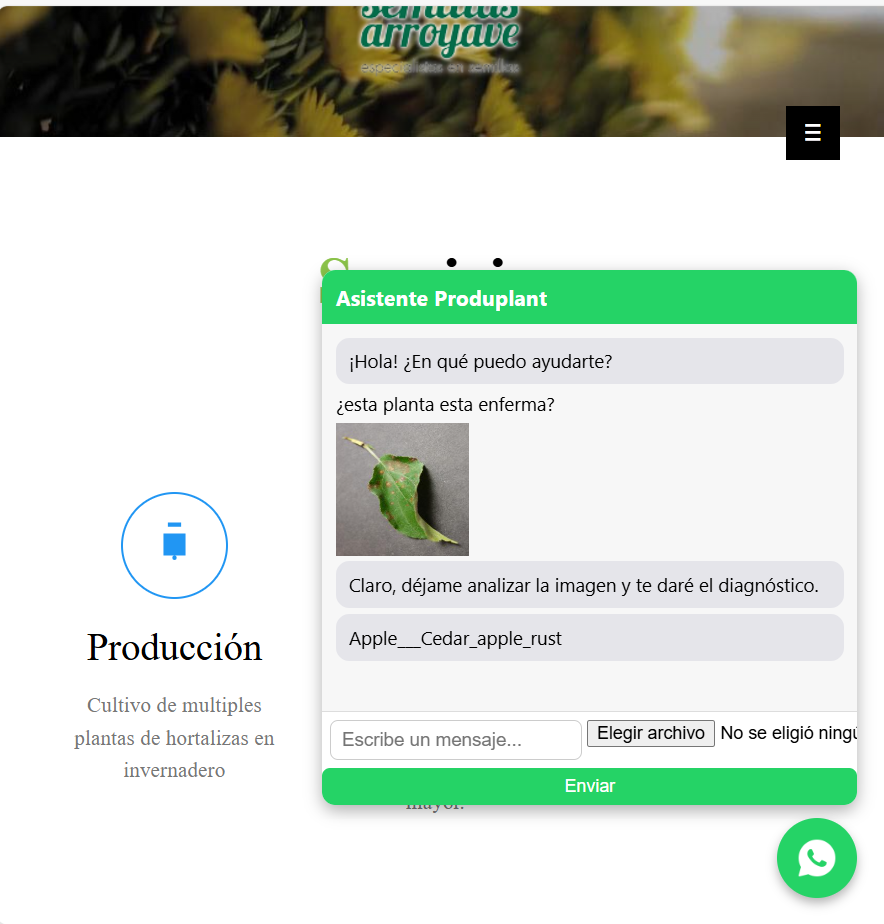